In [1]:
# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Fraud_check (1).csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.describe(include = 'O')

,Undergrad,Marital.Status,Urban
count,600,600,600
unique,2,3,2
top,YES,Single,YES
freq,312,217,302


In [8]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [10]:
# Data Visualization

In [11]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

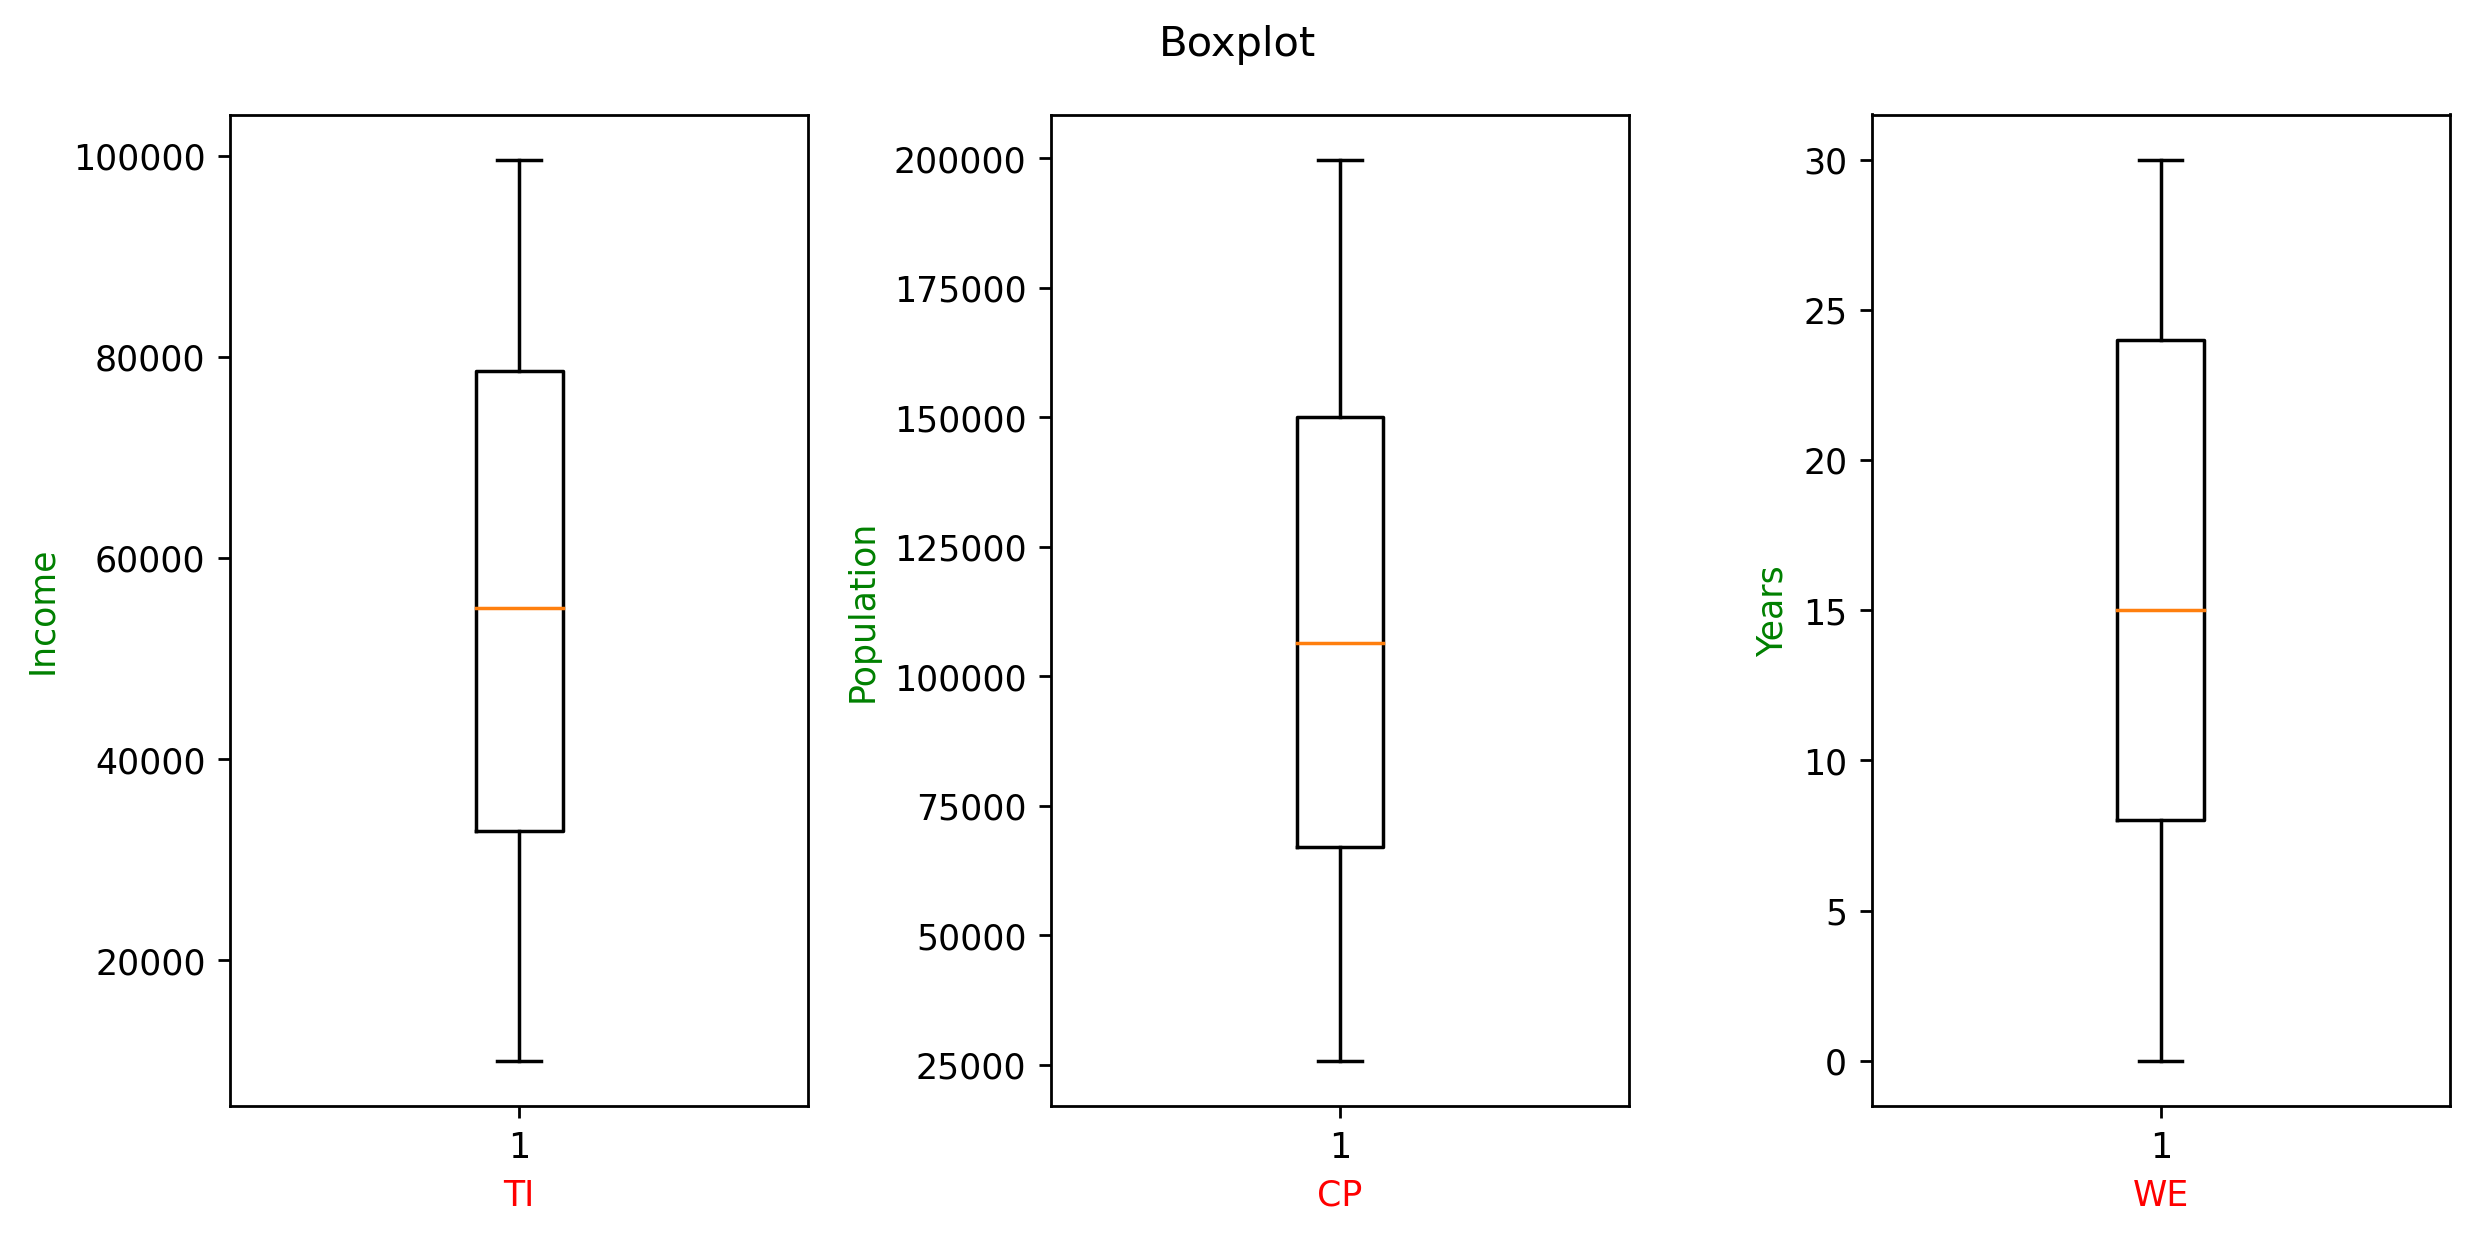

In [17]:
plt.suptitle('Boxplot')
plt.subplot(1,3,1)
plt.boxplot(df['Taxable.Income'])
plt.xlabel('TI', c = 'r')
plt.ylabel('Income', c = 'g')

plt.subplot(1,3,2)
plt.boxplot(df['City.Population'])
plt.xlabel('CP', c = 'r')
plt.ylabel('Population', c = 'g')

plt.subplot(1,3,3)
plt.boxplot(df['Work.Experience'])
plt.xlabel('WE', c = 'r')
plt.ylabel('Years', c = 'g')
plt.tight_layout()

Text(0.5, 1.0, 'Undergrad')

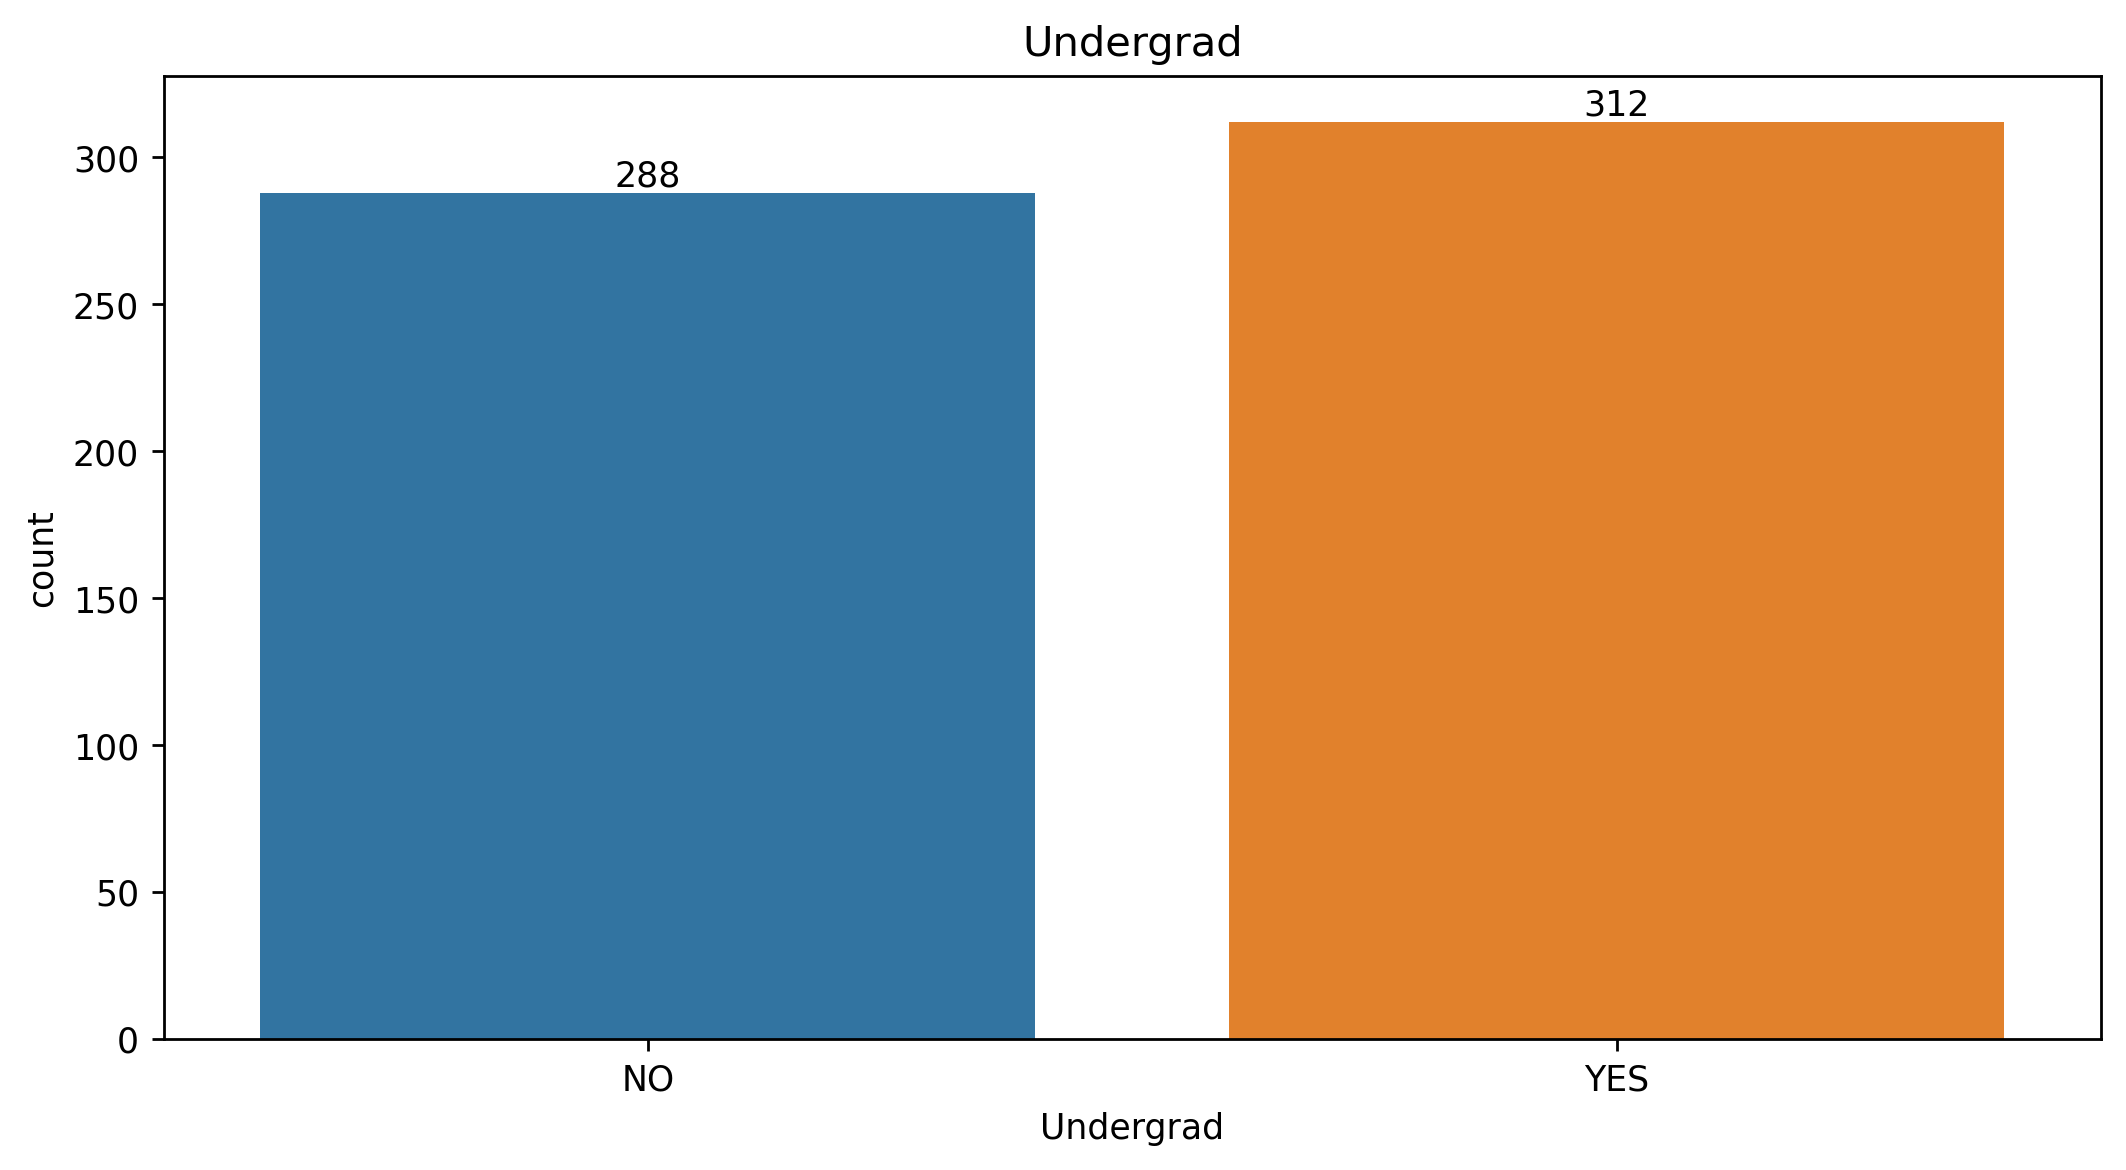

In [18]:
ax = sns.countplot('Undergrad', data = df)
ax.bar_label(ax.containers[0])
plt.title('Undergrad')

Text(0.5, 1.0, 'Marital Status')

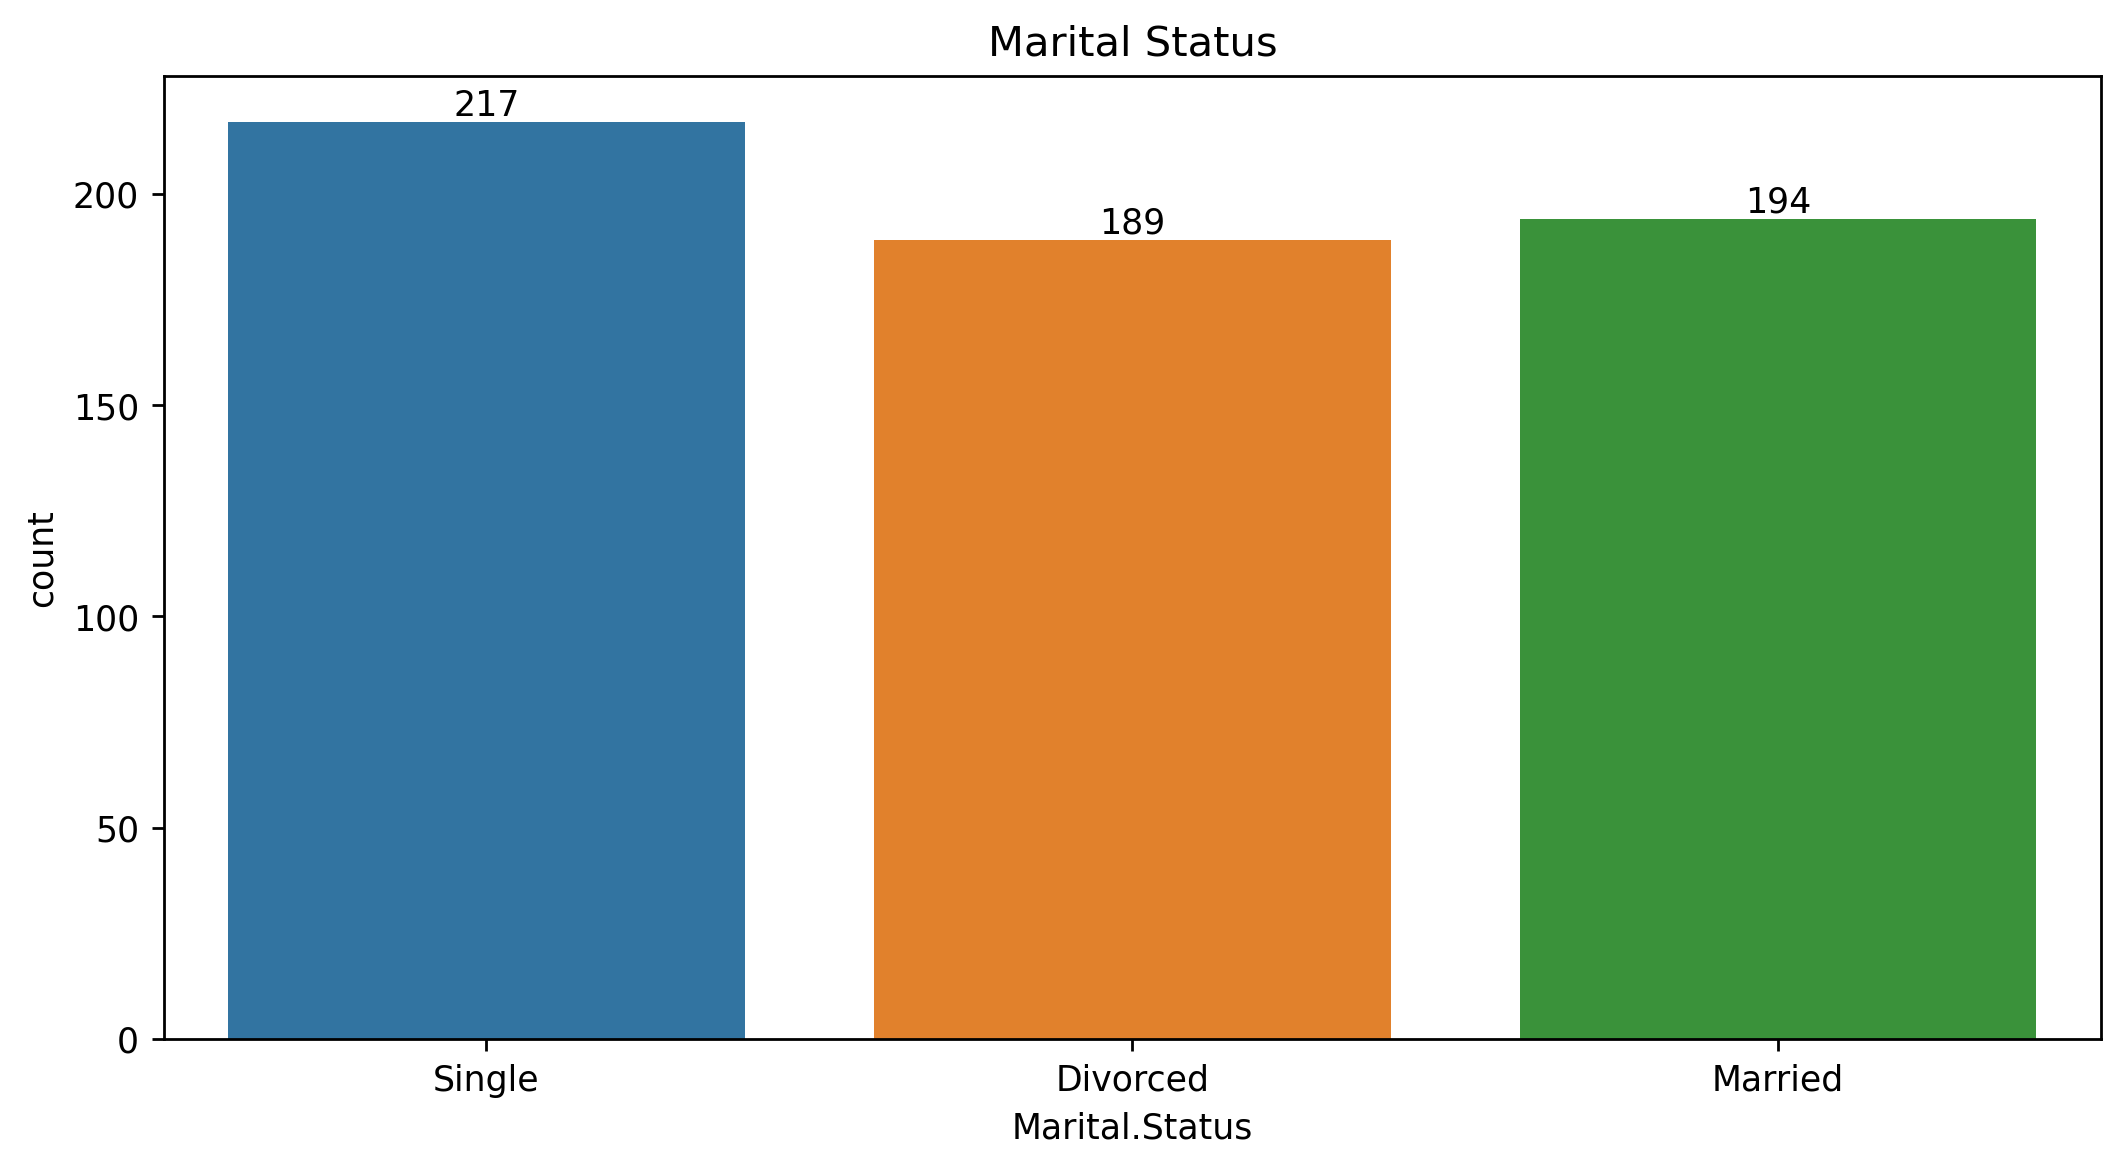

In [21]:
ax = sns.countplot('Marital.Status', data = df)
ax.bar_label(ax.containers[0])
plt.title('Marital Status')

Text(0.5, 1.0, 'Urban')

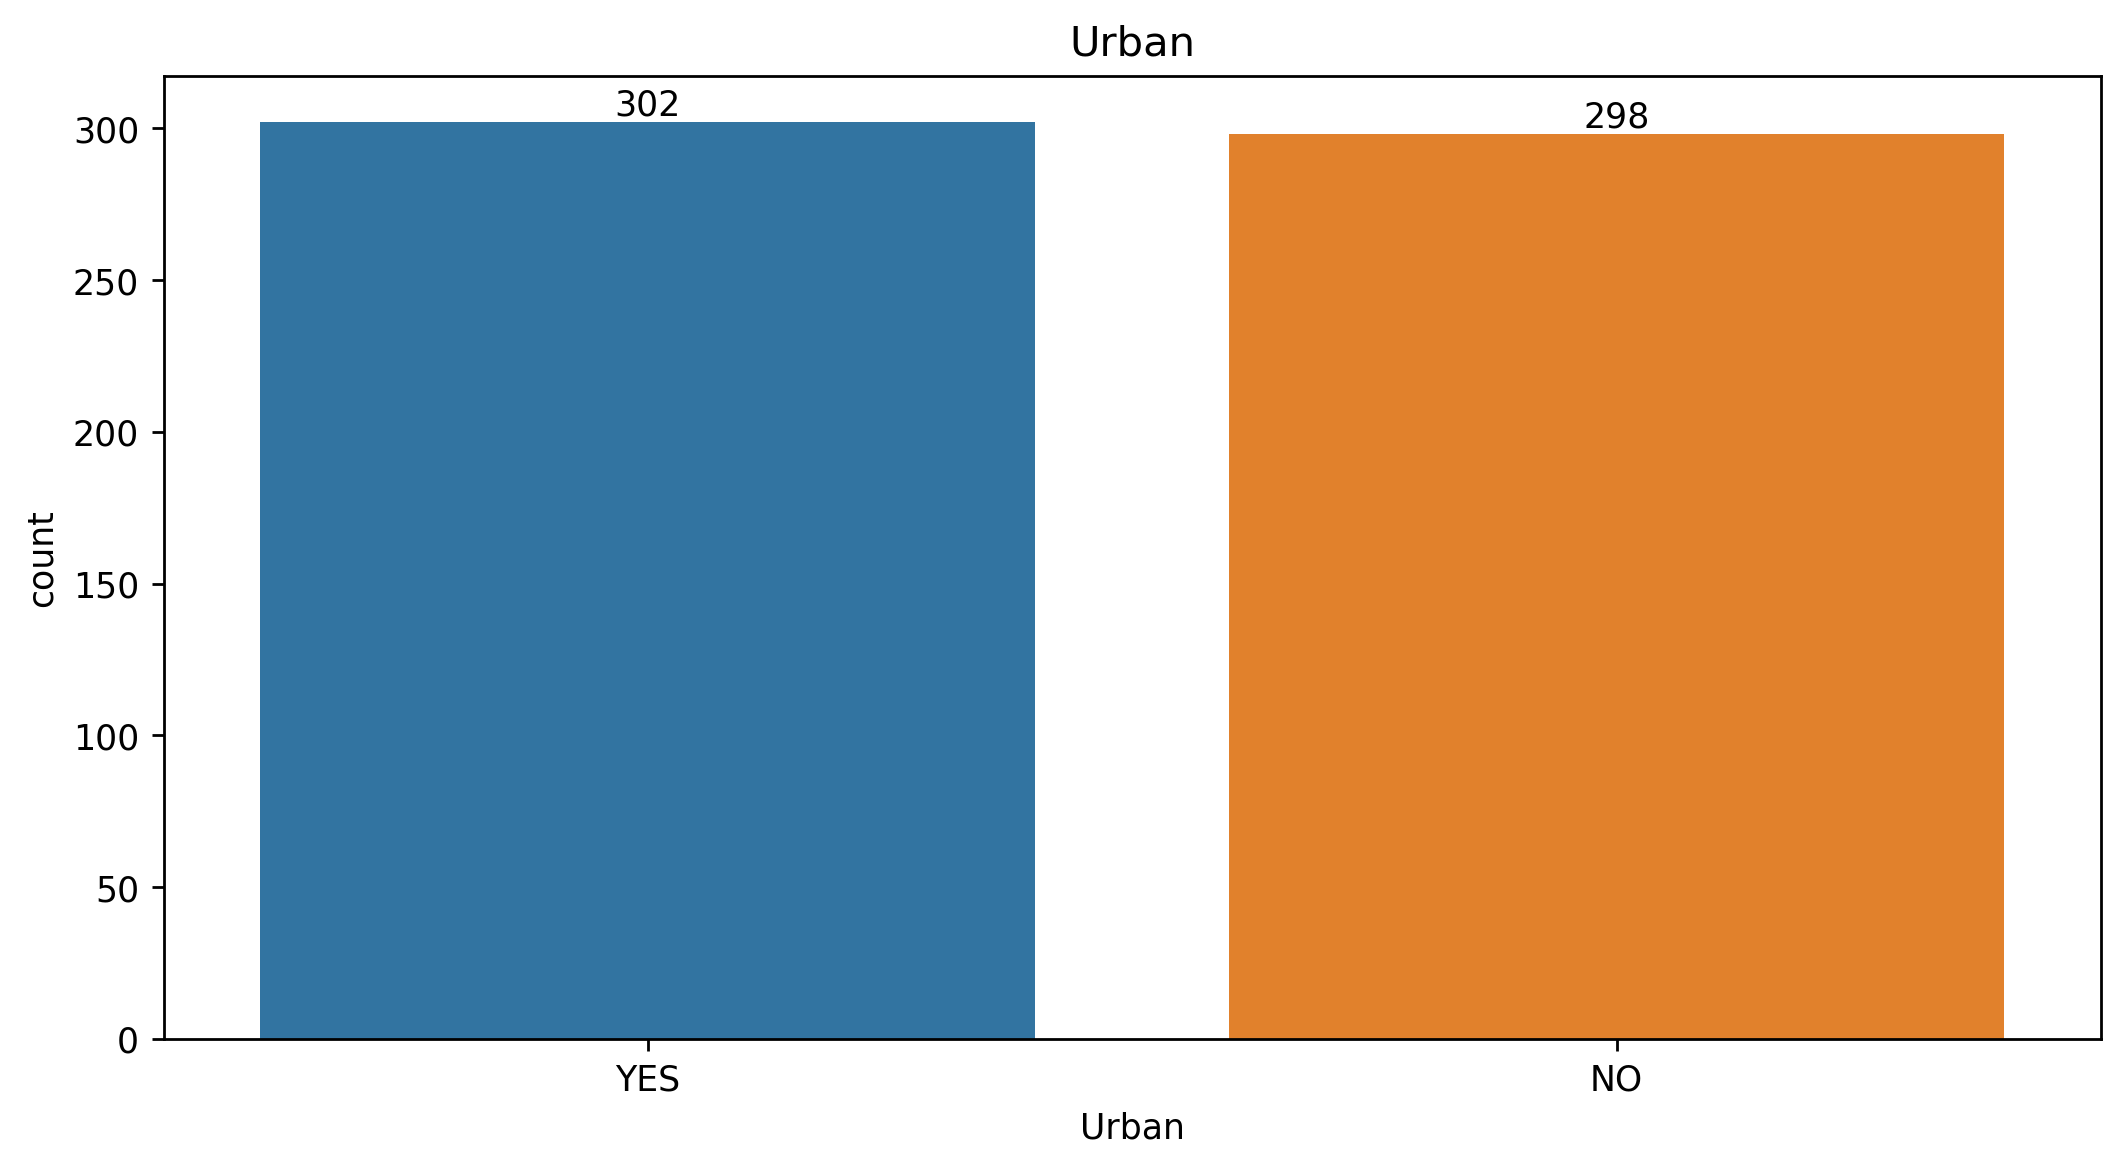

In [22]:
ax = sns.countplot('Urban', data = df)
ax.bar_label(ax.containers[0])
plt.title('Urban')

In [23]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

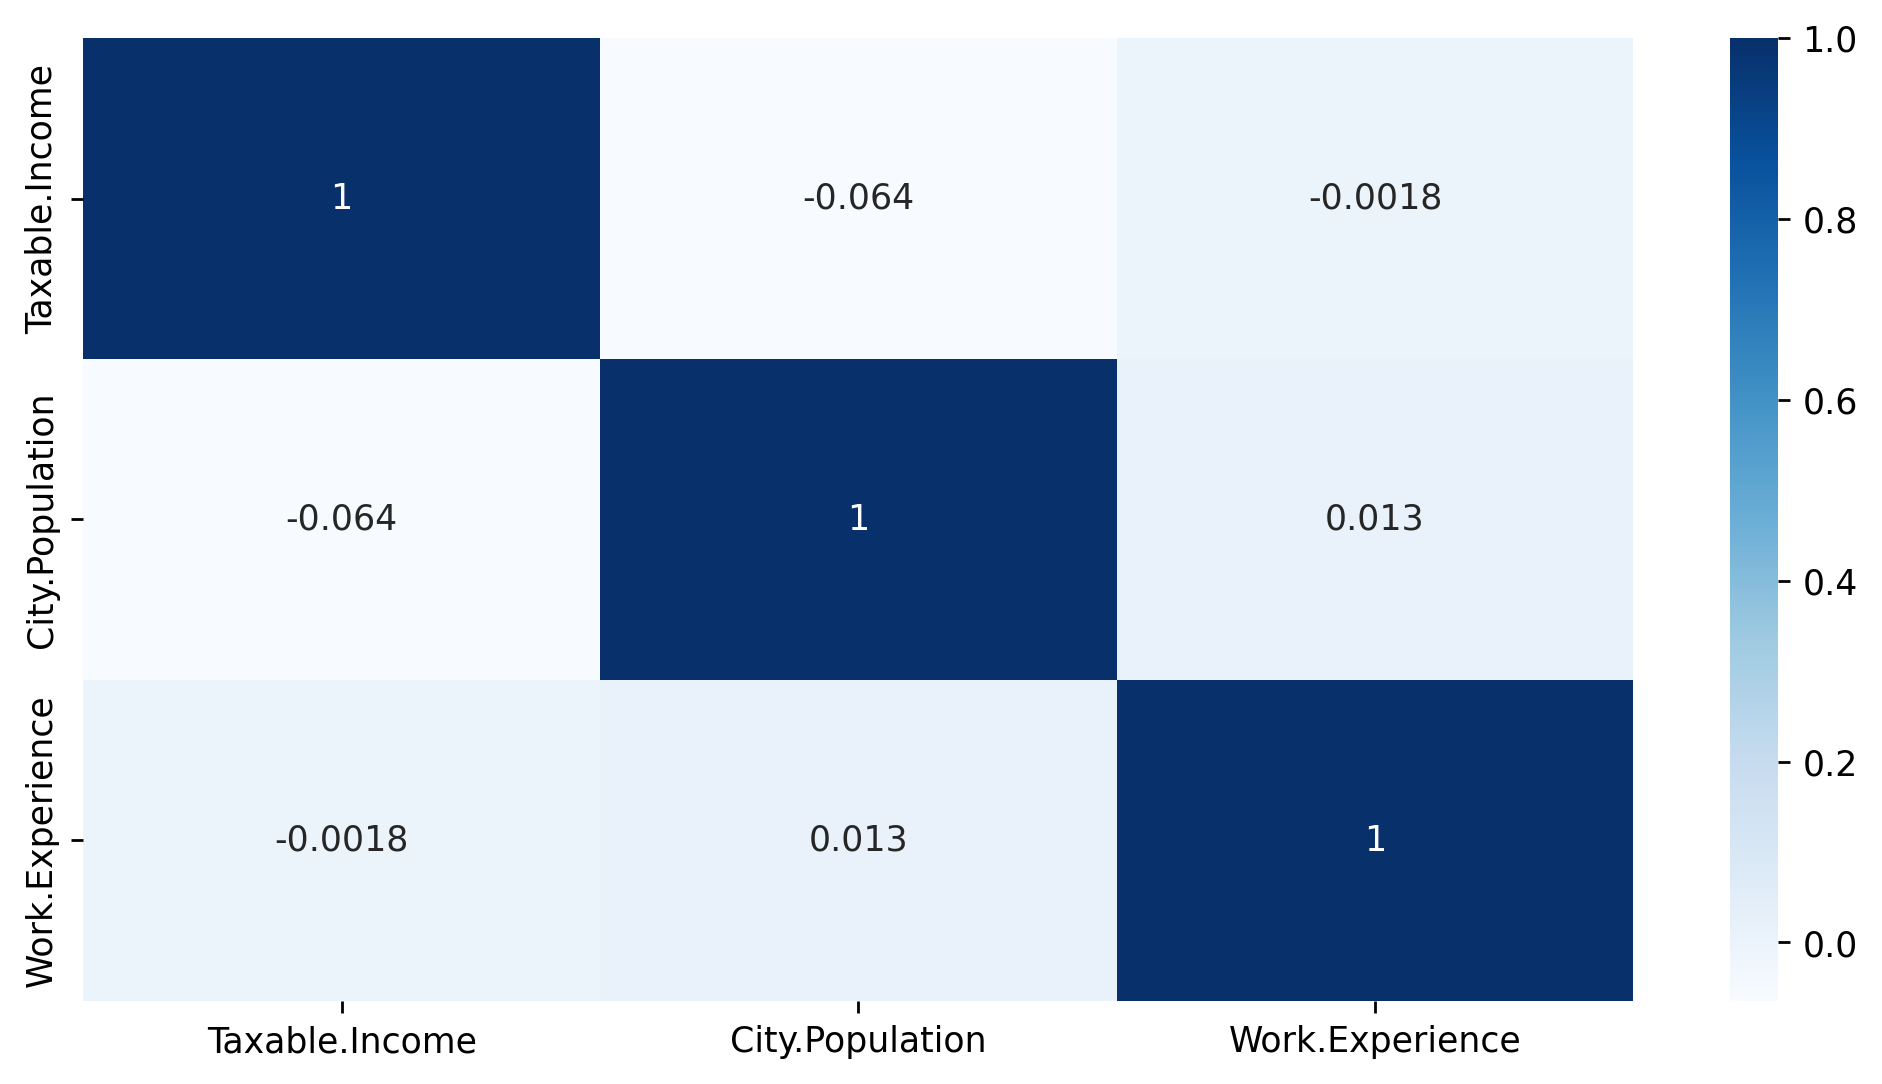

In [24]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

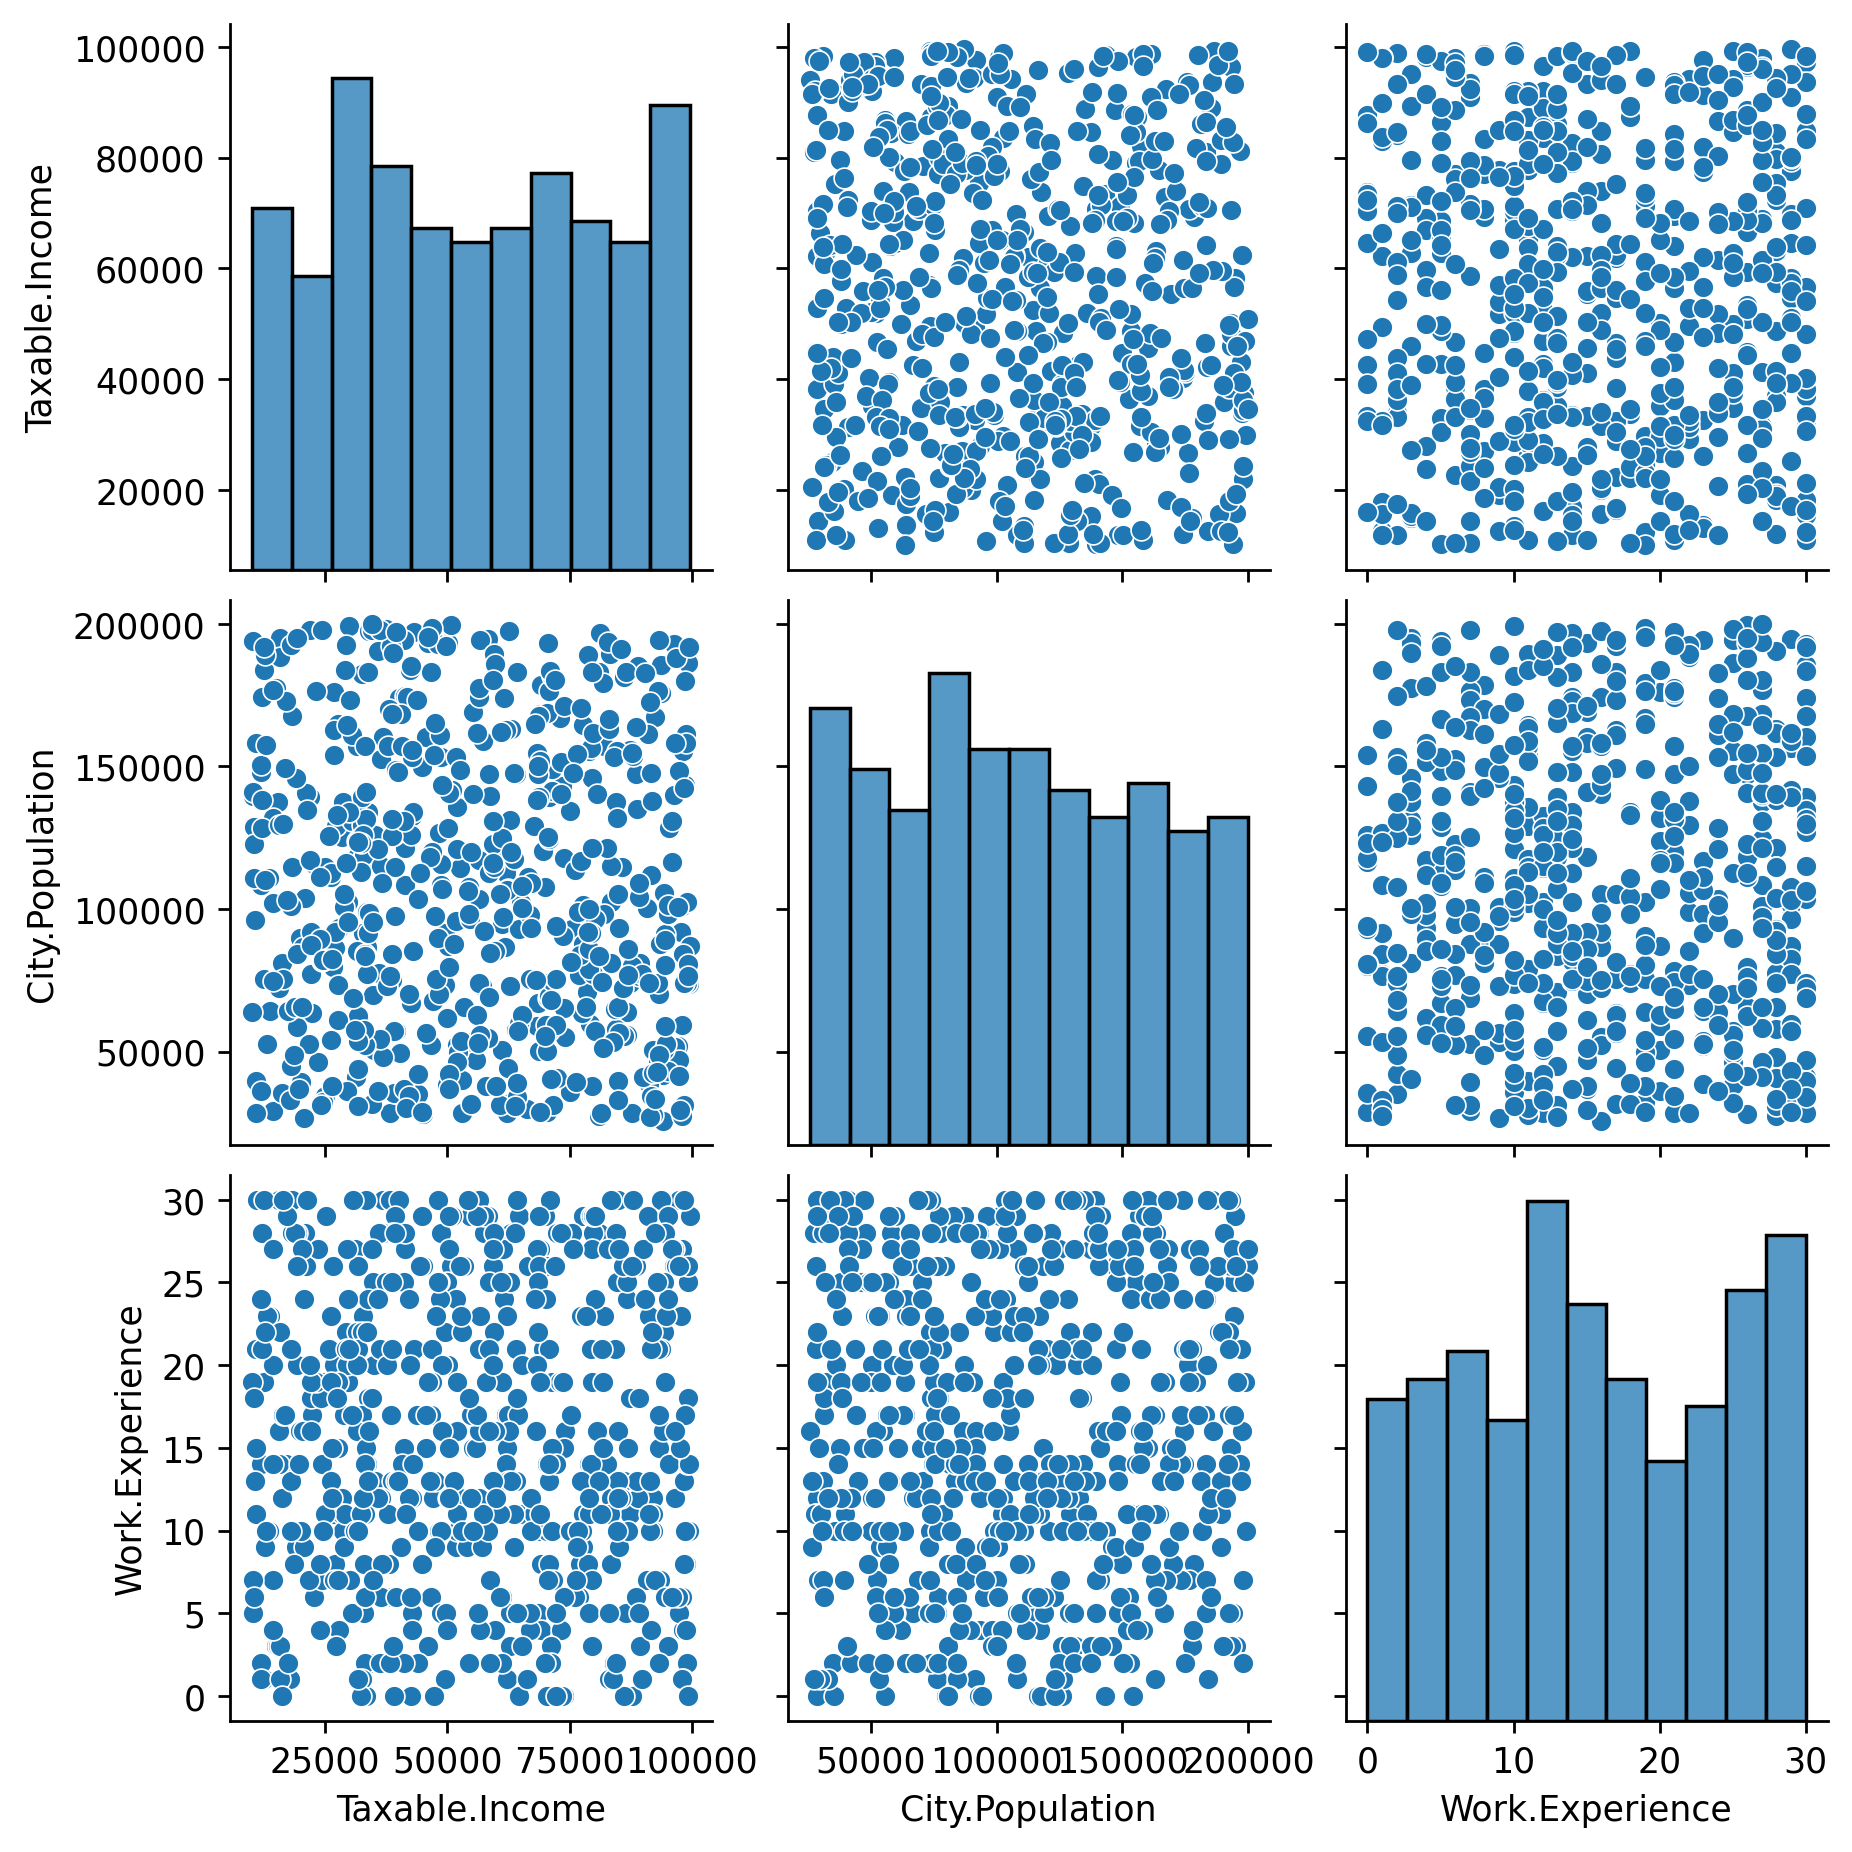

In [25]:
sns.pairplot(df)

In [26]:
# Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [27]:
Class = []

for i in df['Taxable.Income']:
    if i <= 30000:
        Class.append('Risky')
    else:
        Class.append('Good')

In [28]:
Class

['Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Go

In [29]:
# Add new class variable in data

In [30]:
df['Class'] = Class
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


Text(0.5, 1.0, 'Class')

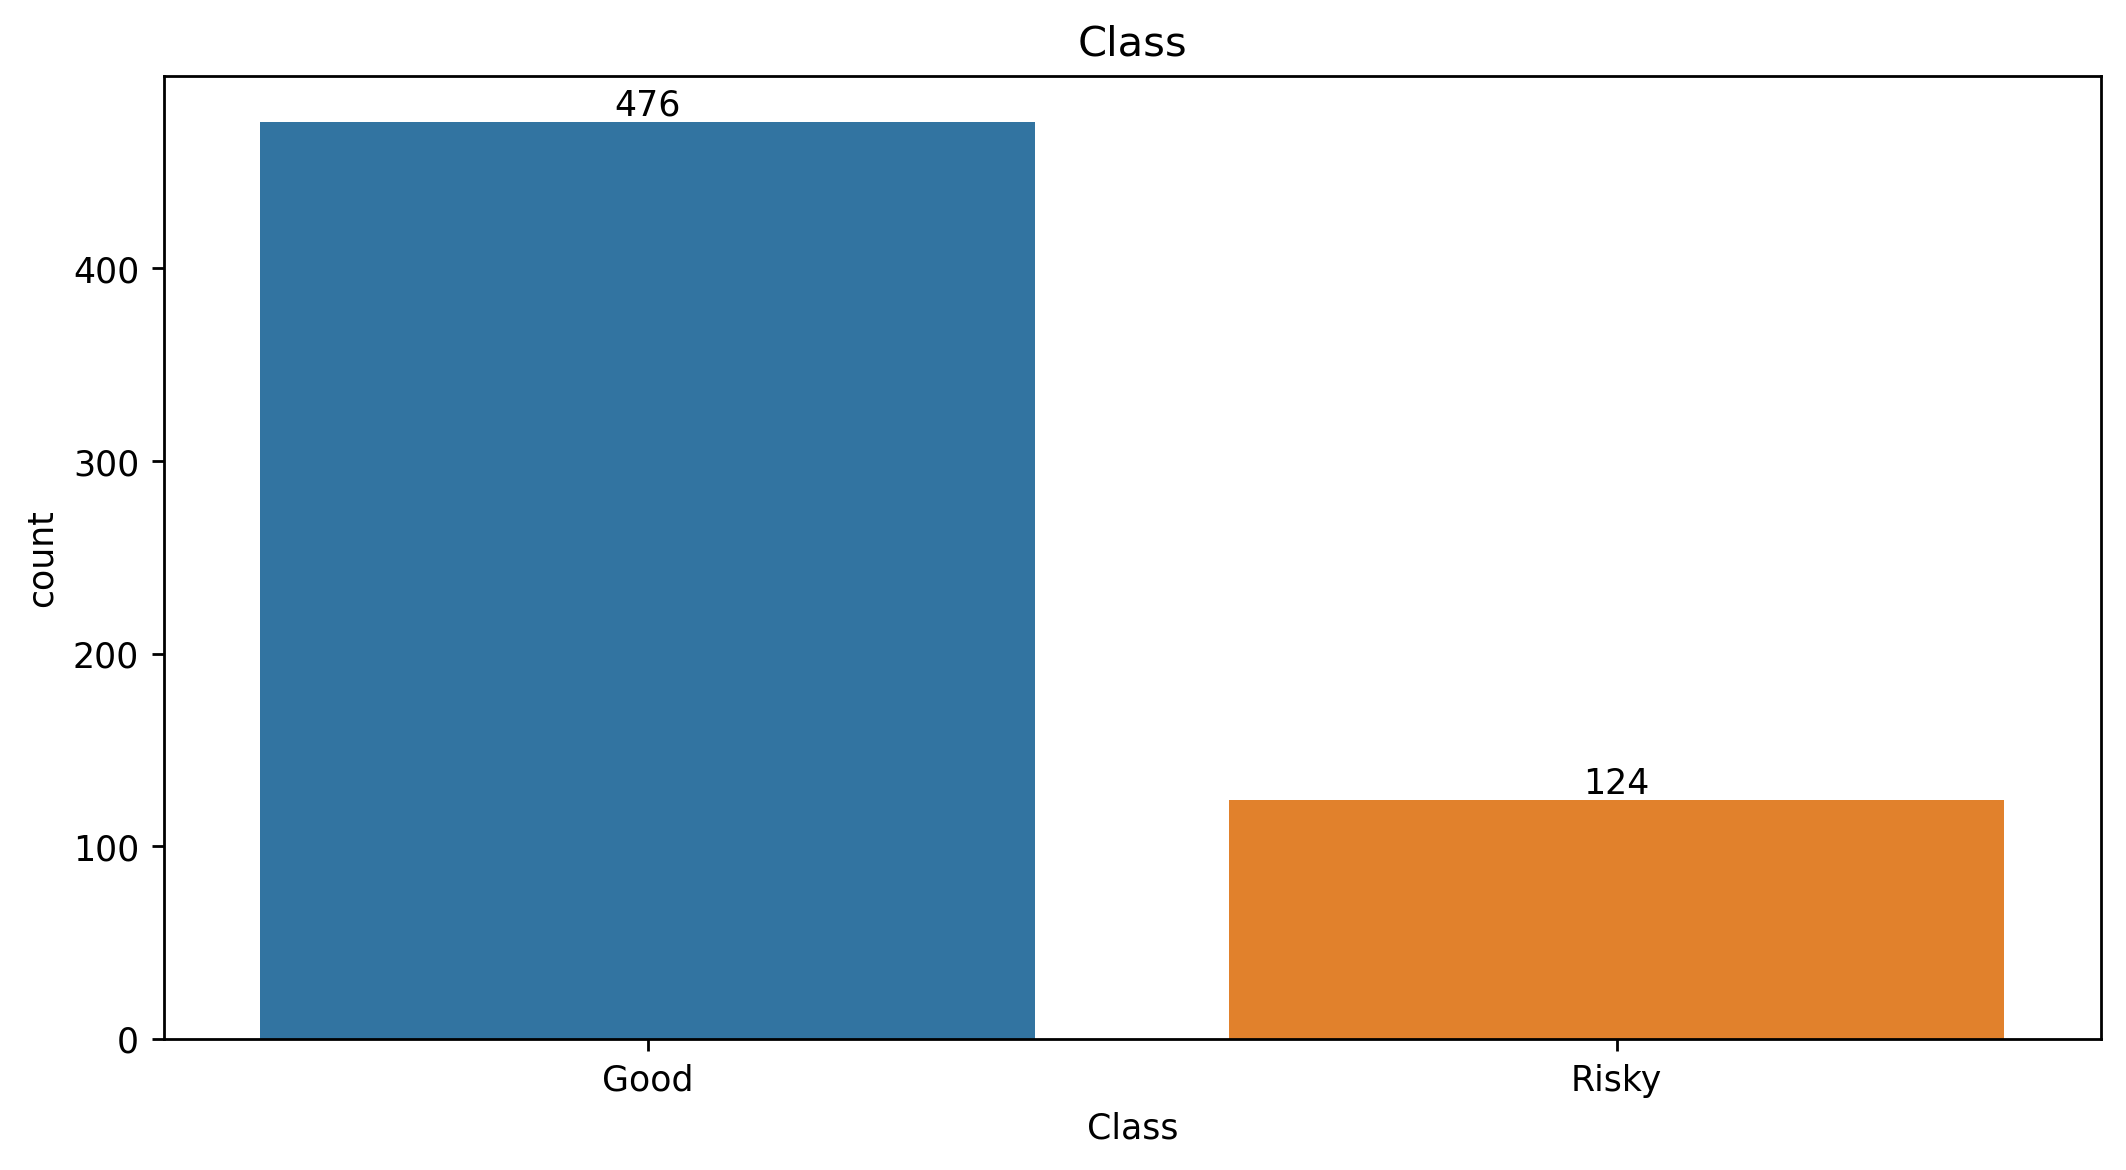

In [32]:
ax = sns.countplot('Class', data = df)
ax.bar_label(ax.containers[0])
plt.title('Class')

In [33]:
# Ordinal encoding for independent variable

In [34]:
oe = OrdinalEncoder()

df[['Undergrad', 'Marital.Status', 'Urban']] = oe.fit_transform(df[['Undergrad', 'Marital.Status', 'Urban']])

In [35]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Class
0,0.0,2.0,68833,50047,10,1.0,Good
1,1.0,0.0,33700,134075,18,1.0,Good
2,0.0,1.0,36925,160205,30,1.0,Good
3,1.0,2.0,50190,193264,15,1.0,Good
4,0.0,1.0,81002,27533,28,0.0,Good
...,...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0,Good
596,1.0,0.0,69967,55369,2,1.0,Good
597,0.0,0.0,47334,154058,0,1.0,Good
598,1.0,1.0,98592,180083,17,0.0,Good


**Model Building:**

- Using Train test split

In [37]:
x = df.iloc[:,0:-1]
y = df['Class']

In [38]:
# Label encoding for target variable

In [39]:
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
df['Class'] = y
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Class
0,0.0,2.0,68833,50047,10,1.0,0
1,1.0,0.0,33700,134075,18,1.0,0
2,0.0,1.0,36925,160205,30,1.0,0
3,1.0,2.0,50190,193264,15,1.0,0
4,0.0,1.0,81002,27533,28,0.0,0
...,...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0,0
596,1.0,0.0,69967,55369,2,1.0,0
597,0.0,0.0,47334,154058,0,1.0,0
598,1.0,1.0,98592,180083,17,0.0,0


In [41]:
# Splitting data

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [43]:
# Random forest model using Decision tree CART - gini inpurities

In [44]:
model = RandomForestClassifier(n_estimators = 150, criterion = 'gini', max_depth = 2)

model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        23

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [45]:
print('Training Accuracy: ', model.score(xtrain, ytrain))
print('Testing Accuracy: ', model.score(xtest, ytest))

Training Accuracy:  1.0
Testing Accuracy:  1.0


In [46]:
# Random forest model using Decision tree C5.0

In [47]:
model1 = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', max_depth = 2)

model1.fit(xtrain, ytrain)
ypred1 = model1.predict(xtest)

print(classification_report(ytest, ypred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        23

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [48]:
print('Training Accuracy: ', model1.score(xtrain, ytrain))
print('Testing Accuracy: ', model1.score(xtest, ytest))

Training Accuracy:  1.0
Testing Accuracy:  1.0


- Using Kfold-cross validation

In [49]:
# Random forest model using Decision tree CART - gini impurities 

In [50]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)

model2 = RandomForestClassifier(n_estimators = 150, criterion = 'gini', max_features = 2)
result = cross_val_score(model2, x,y, cv = kfold)

result.mean()

0.9983333333333334

In [51]:
# Random forest model using Decision tree C5.0 

In [52]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)

model2 = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', max_features = 2)
result = cross_val_score(model2, x,y, cv = kfold)

result.mean()

0.9983333333333334